# Tickets by Gender

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
traffic_tickets = pd.read_pickle("clean_data.pkl")

len(traffic_tickets)

5931532

## Traffic Tickets by Gender

In [5]:
total_tickets_by_gender = traffic_tickets.Gender.value_counts()

total_tickets_by_gender

M    4186645
F    1744887
Name: Gender, dtype: int64

In [6]:
BLACK = "#353238"
RED = "#eb4034"
BLUE = "#3456eb"
WHITE = "#f9f9f9"

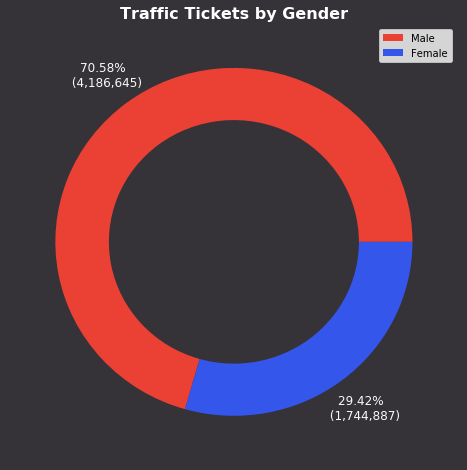

In [7]:
# Thanks https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
# for  `make_autopct()`
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total / 100))
        return '{p:.2f}% \n ({v:,})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(facecolor=BLACK, figsize=(8,8))

total_tickets_by_gender.plot(
    kind="pie",                      
    wedgeprops=dict(width=0.3), 
    colors=[RED, BLUE],
    labels=None,
    autopct=make_autopct(traffic_tickets.Gender.value_counts()),
    pctdistance=1.2,    
    textprops={"color": WHITE, "fontsize": 12}    
)

ax.set_title("Traffic Tickets by Gender", 
             color="white", 
             fontdict={"size": "16", "fontweight": "bold"})
ax.set_ylabel('')
ax.legend(labels=["Male", "Female"])

plt.savefig("gender-pie.jpg", bbox_inches="tight", dpi=120, pad_inches=0.2)

## Top 10 Violations by Gender

In [84]:
top_male_violations = traffic_tickets.loc[traffic_tickets.Gender == "M"] \
                        .Violation \
                        .value_counts()[:10]
        
top_male_violations

SPEED IN ZONE                            425166
DISOBEYED TRAFFIC DEVICE                 295607
SPEED OVER 55 ZONE                       202797
UNINSPECTED MOTOR VEHICLE                199601
SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT    199025
OPERATING MV MOBILE PHONE                146310
UNLICENSED OPERATOR                      144529
SPEED IN ZONE 11-30                      137148
FLD TO STOP AT STOP SIGN                 127040
NO SEAT BELT ADULT                       101453
Name: Violation, dtype: int64

In [85]:
top_female_violations = traffic_tickets.loc[traffic_tickets.Gender == "F"] \
                        .Violation \
                        .value_counts()[:10]
top_female_violations

SPEED IN ZONE                            259350
DISOBEYED TRAFFIC DEVICE                 117068
SPEED OVER 55 ZONE                       108714
UNINSPECTED MOTOR VEHICLE                 98714
OPERATING MV MOBILE PHONE                 77648
NO/INADEQUATE HEADLAMPS                   60413
UNLICENSED OPERATOR                       59363
FLD TO STOP AT STOP SIGN                  58758
OPER MV WHILE USING PORTABLE ELEC DEV     48581
SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT     44720
Name: Violation, dtype: int64

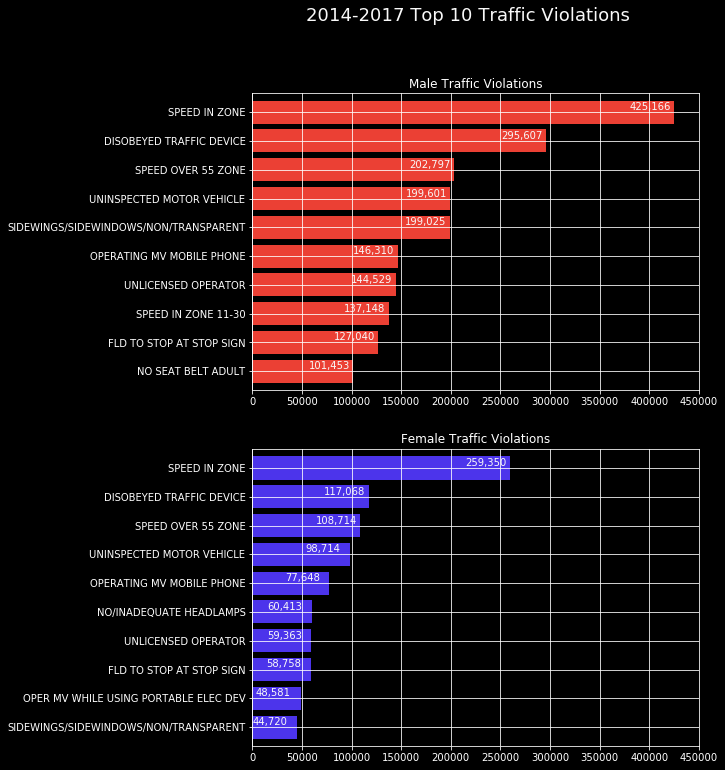

In [159]:
with plt.style.context('dark_background'):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

    top_male_violations.plot(
        kind="barh", 
        ax=ax1, 
        width=0.8,
        title="Male Traffic Violations", 
        color=RED
    ) 

    top_female_violations.plot(
        kind="barh", 
        ax=ax2, 
        width=0.8,
        title="Female Traffic Violations", 
        color=BLUE
    ) 
    
fig.suptitle("2014-2017 Top 10 Traffic Violations", color=WHITE, fontsize=18)

for ax in (ax1, ax2):    
    ax.invert_yaxis()
    ax.set_xlim(right=450000)
    ax.grid()


for i in range(len(top_male_violations)):
    MOVE_BY = 45000
    ax1.text(top_male_violations[i] - MOVE_BY, i-.075, '{:,}'.format(top_male_violations[i]), color=WHITE)
    ax2.text(top_female_violations[i] - MOVE_BY, i-.075, '{:,}'.format(top_female_violations[i]), color=WHITE)

plt.savefig("gender-bar.jpg", bbox_inches="tight", pad_inches=0.2)